Data Analytics I

    Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.

The objective is to predict the value of prices of the house using the given features.

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
boston_ds = load_boston()

/home/student/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

In [3]:
df = pd.DataFrame(boston_ds.data, columns = boston_ds.feature_names)

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
df.shape

(506, 13)

In [6]:
print(boston_ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
# Creating new column MEDV for median values.
# MEDV is the new column consisting of target values that we are trying to predict
# We are adding MEDV to our data set
df['MEDV'] = boston_ds.target

In [8]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
df.shape

(506, 14)

In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


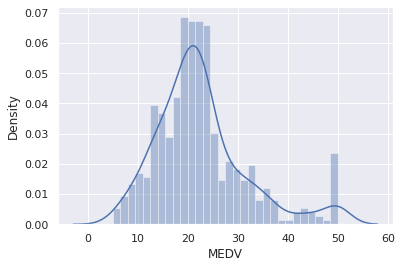

In [12]:
# To visualize the distribution of MEDV and check for outliers
sns.set(rc = {'figure.figsize':(11.7, 8.27)})
sns.distplot(df['MEDV'], bins = 30)
plt.show()

<AxesSubplot:>

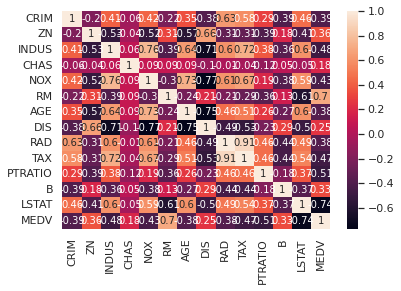

In [13]:
# To visualize the correlation between the features and MEDV
correlation_matrix = df.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

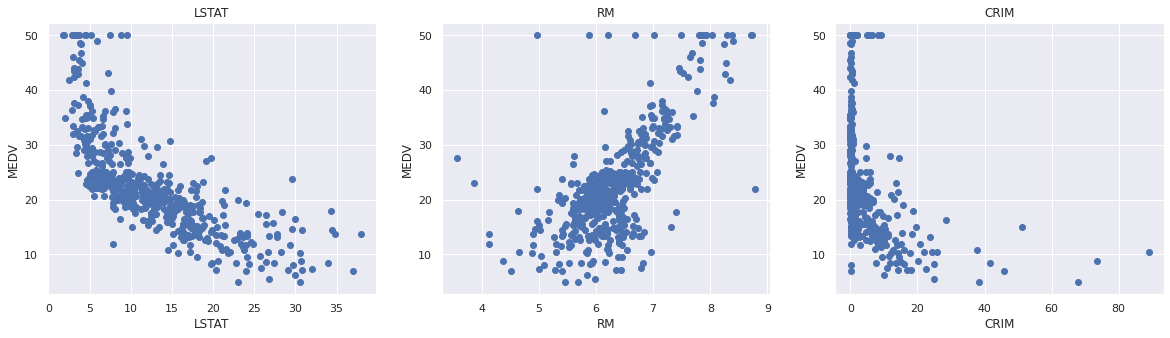

In [14]:
# To visualize the relation between MEDV and LSAT, RM, and CRIM
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'CRIM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [15]:
# X is the independent variables and Y is the dependent variable
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM'], df['CRIM']], columns = ['LSTAT','RM', 'CRIM'])
Y = df['MEDV']

In [16]:
# Splitting the data into training and test sets (80% training and 20% testing)
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [17]:
X_train_1.shape

(404, 3)

In [18]:
X_test_1.shape

(102, 3)

In [19]:
Y_test_1.shape

(102,)

In [20]:
Y_train_1.shape

(404,)

In [22]:
# Using scikit-learn's Linear Regression to train our model on both the training and check it on the test sets, and check the model performance on the train dataset.
lr = LinearRegression()
lr.fit(X_train_1, Y_train_1)

LinearRegression()

In [23]:
# Predicting MEDV values for training using X_train_1
y_train_predict_1 = lr.predict(X_train_1)

In [24]:
y_train_predict_1

array([ 1.63073694e+01,  3.68354325e+01,  8.31332827e+00,  2.44187578e+01,
        1.74821494e+01,  2.21913407e+01,  2.56875355e+01,  1.63780400e+01,
        2.83922342e+01,  2.20414697e+01,  1.99593213e+01,  2.94210852e+01,
        2.07909203e+01,  1.21032167e+01,  1.87877171e+01,  1.76809841e+01,
        1.86635996e+01,  1.96798816e+01,  2.35575777e+01,  3.22927641e+01,
        2.68317539e+01,  2.02797569e+01,  2.42581295e+01,  2.84702721e+01,
        2.13296447e+01,  1.78870472e+01,  2.31467419e+01,  3.67300161e+01,
        3.68672517e+01,  2.46968550e+01,  1.21953709e+01,  1.84432540e+01,
        1.69833650e+01,  2.19775506e+01,  1.44003276e+01,  2.40179615e+00,
        2.75318910e+01,  3.02034931e+01,  2.22255572e+01,  2.03540518e+01,
        1.94880392e+01,  2.26410383e+01,  3.15047037e+01,  2.25022961e+01,
        2.92418783e+01,  1.99698626e+01,  2.40308242e+01,  2.81472550e+01,
        1.52246134e+01,  3.19493831e+01,  1.52540346e+01,  1.59331931e+01,
        2.76789540e+01,  

In [26]:
# Using Root Mean Square Error for checking deviation and error detection
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))

In [27]:
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
RMSE is 5.577161434107161


In [28]:
# Predicting MEDV values for testing using X_test_1
y_test_predict_1 = lr.predict(X_test_1)

In [29]:
# Using Root Mean Square Error for checking deviation and error detection
rmse = (np.sqrt(mean_squared_error(Y_test_1, y_test_predict_1)))

In [30]:
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for testing set
--------------------------------------
RMSE is 5.090926233939894


In [32]:
print("Training Accuracy:")
lr.score(X_train_1, Y_train_1)

Training Accuracy:


0.6379032016446058

In [33]:
print("Testing Accuracy")
lr.score(X_test_1, Y_test_1)

Testing Accuracy


0.668971142334428